<a href="https://colab.research.google.com/github/VictorThrive/AgricConnect-PHL/blob/master/Python/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [9]:
df_log = pd.read_excel('https://github.com/VictorThrive/AgricConnect-PHL/raw/master/dataset/other_datasets/logistics.xlsx')

In [10]:
df_log.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection
0,566,Nigeria,Katsina,112,Maize (corn),2021,2.37259,2.37259,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates
1,566,Nigeria,Katsina,112,Maize (corn),2021,4.58573,4.58573,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates
2,566,Nigeria,Katsina,112,Maize (corn),2021,6.42000,6.42000,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates
3,566,Nigeria,Katsina,112,Maize (corn),2021,4.00000,4.00000,NaN,Drying,Farm,NaN,NaN,NaN,Modelled Estimates
4,566,Nigeria,Katsina,112,Maize (corn),2021,1.32000,1.32000,NaN,"Shelling, Threshing",NaN,NaN,NaN,NaN,Modelled Estimates


In [11]:
df_log.shape

(57, 15)

In [12]:
df_log.isnull().sum().sort_values(ascending=False)

,0
cause_of_loss,57
sample_size,57
loss_quantity,57
treatment,57
food_supply_stage,12
region,5
m49_code,0
loss_percentage,0
year,0
commodity,0


In [13]:
# Fill categorical missing values with 'Unknown'
df_log['cause_of_loss'] = df_log['cause_of_loss'].fillna('Unknown')
df_log['treatment'] = df_log['treatment'].fillna('Unknown')
df_log['food_supply_stage'] = df_log['food_supply_stage'].fillna('Unknown')
df_log['region']=df_log['region'].fillna('Unknown')

In [14]:
df_log.isnull().sum().sort_values(ascending=False)

,0
loss_quantity,57
sample_size,57
m49_code,0
cpc_code,0
commodity,0
country,0
region,0
loss_percentage,0
year,0
activity,0


# 1. Getting the Crops with the Highest Average Loss


In [15]:
# 1. Top  Commodities with Highest Average Loss
top_commodities = df_log.groupby('commodity')['loss_percentage'].mean().sort_values(ascending=False).head(10)


top_commodities.head()

,loss_percentage
commodity,
Maize (corn),3.757285
Sorghum,3.229316
Rice,2.447581
Millet,2.015445


<ipython-input-16-6c03e96ec963>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_commodities.values, x=top_commodities.index, palette="viridis")


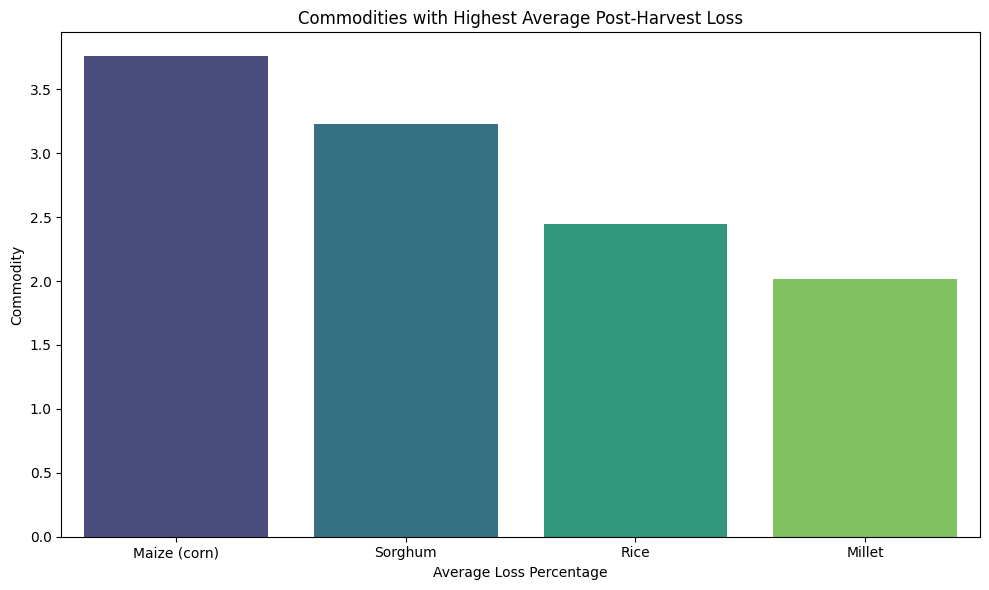

In [16]:
#Visualizing

plt.figure(figsize=(10,6))
sns.barplot(y=top_commodities.values, x=top_commodities.index, palette="viridis")
plt.title('Commodities with Highest Average Post-Harvest Loss')
plt.xlabel('Average Loss Percentage')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()

# 2. Average Loss by Food Supply Stage

<ipython-input-17-b230ddf703bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=supply_stage_loss.values, x=supply_stage_loss.index, palette="coolwarm",edgecolor="black")


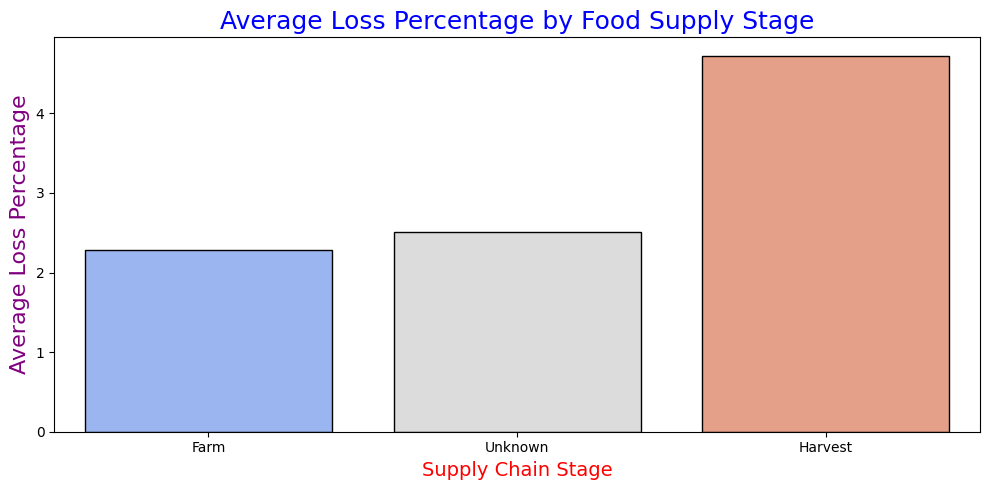

In [17]:
supply_stage_loss = df_log.groupby('food_supply_stage')['loss_percentage'].mean().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(y=supply_stage_loss.values, x=supply_stage_loss.index, palette="coolwarm",edgecolor="black")
plt.title('Average Loss Percentage by Food Supply Stage', color= 'blue',fontsize =18)
plt.ylabel('Average Loss Percentage', color= 'purple',fontsize= 16)
plt.xlabel('Supply Chain Stage',color='red',fontsize = 14)
plt.tight_layout()
plt.show()


# 3. Count of Loss Causes

<ipython-input-18-dd8aceee4da9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='cause_of_loss', data=df_log, order=df_log['cause_of_loss'].value_counts().index, palette="viridis",legend=False)


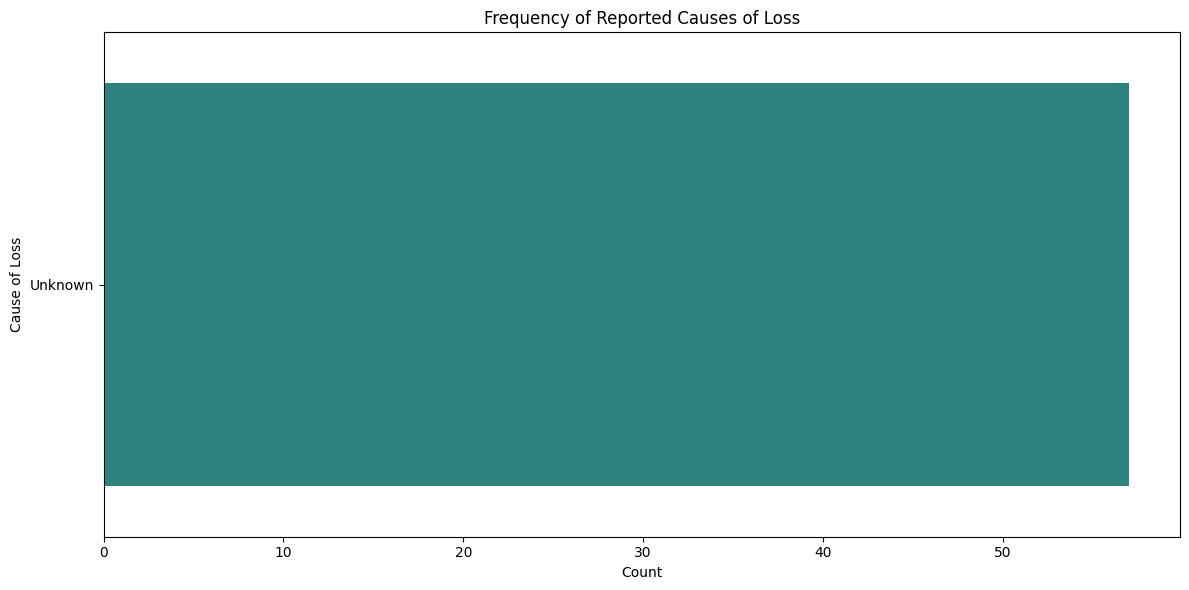

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(y='cause_of_loss', data=df_log, order=df_log['cause_of_loss'].value_counts().index, palette="viridis",legend=False)
plt.title('Frequency of Reported Causes of Loss')
plt.xlabel('Count')
plt.ylabel('Cause of Loss')
plt.tight_layout()
plt.show()

# 4. To know the Logistic Activity with the highest loss percentage

In [19]:
# Group by activity and calculate mean loss percentage
activity_loss = df_log.groupby('activity')['loss_percentage'].mean().sort_values(ascending=False)


("Top Logistic Activities by Average Loss Percentage:")
(activity_loss.head())

,loss_percentage
activity,
"Drying, Harvesting",4.718332
Drying,4.000000
"Shelling, Threshing",2.514285
Storage,2.263404
Transportation,2.072370


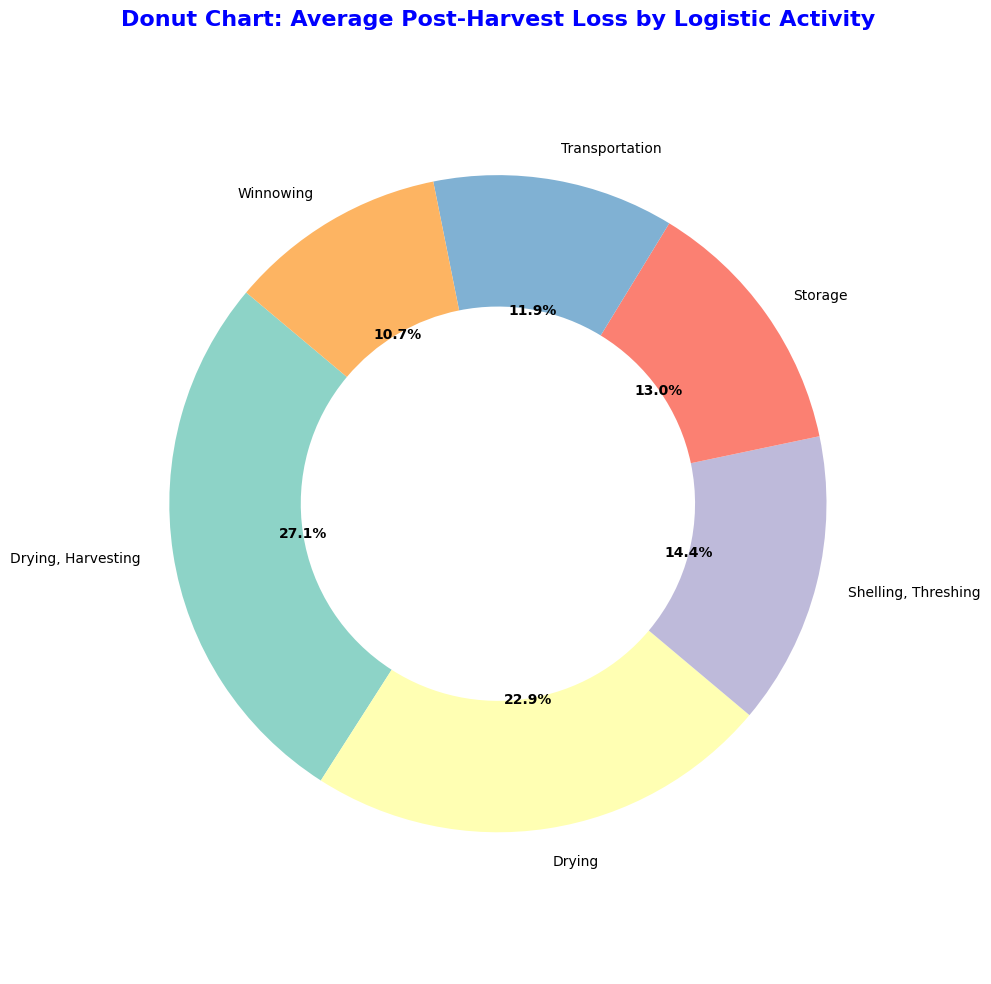

In [20]:
#Visualizing

# Define colors
colors = plt.get_cmap('Set3').colors

# Donut chart
plt.figure(figsize=(10,10))
wedges, texts, autotexts = plt.pie(
    activity_loss,
    labels=activity_loss.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Donut Chart: Average Post-Harvest Loss by Logistic Activity", fontsize=16, weight='bold',color='blue')
plt.axis('equal')  # Makes it circular
plt.tight_layout()
plt.show()

# 5. Getting the State and Year with highest loss percentage during Logistics activities


In [21]:
# Group by activity and calculate mean loss percentage
region_loss = df_log.groupby('region')['loss_percentage'].mean().sort_values(ascending=False)
year_loss=df_log.groupby('year')['loss_percentage'].mean().sort_values(ascending=False)
commodity_loss = df_log.groupby('commodity')['loss_percentage'].mean().sort_values(ascending=False)


(region_loss.head(10))

,loss_percentage
region,
Kaduna,3.766336
Katsina,3.752759
Ebonyi,3.230360
Niger,3.230182
Niger,3.227405
Benue State,2.454157
Plateau,2.444346
Benue,2.444241
Adamawa,2.033572


In [22]:
#I noticed The Niger is being duplicated because some of the Niger in the data set has space after it while some do not have also Benue, some has Benue while thers is Benue State, hence i will be stripig the region column

# Strip any leading or trailing spaces and standardize capitalization
df_log['region'] = df_log['region'].str.strip().str.title()


#Group by again
region_loss = df_log.groupby('region')['loss_percentage'].mean().sort_values(ascending=False)
(region_loss.head())

,loss_percentage
region,
Kaduna,3.766336
Katsina,3.752759
Ebonyi,3.230360
Niger,3.228794
Benue State,2.454157


In [23]:
(year_loss.head())


,loss_percentage
year,
2019,2.849589
2020,2.849407
2021,2.830292


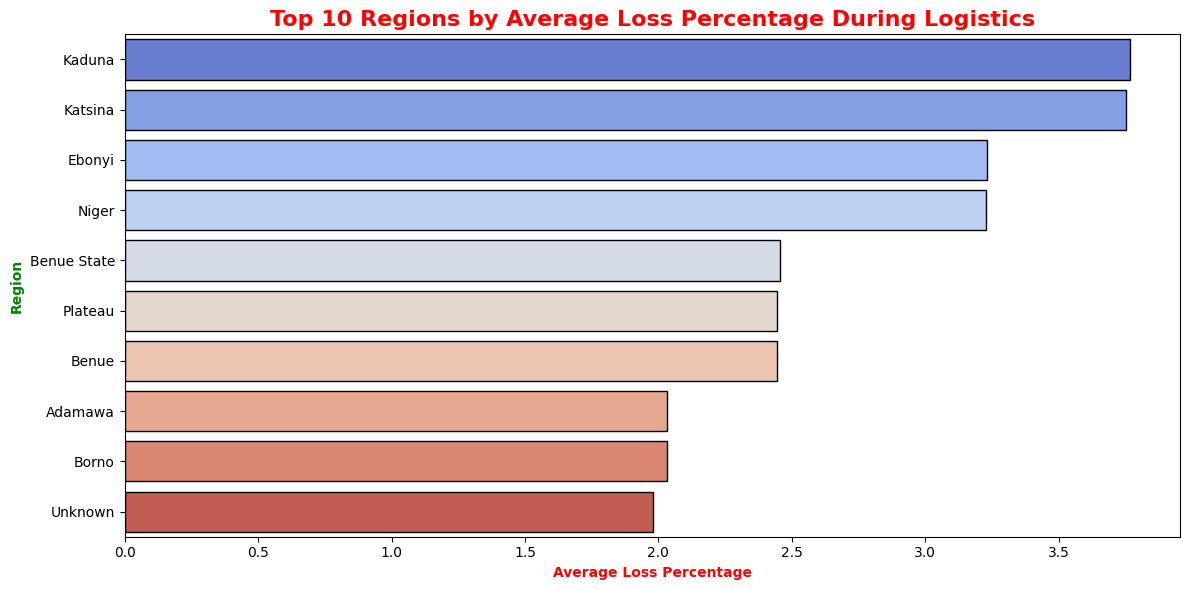

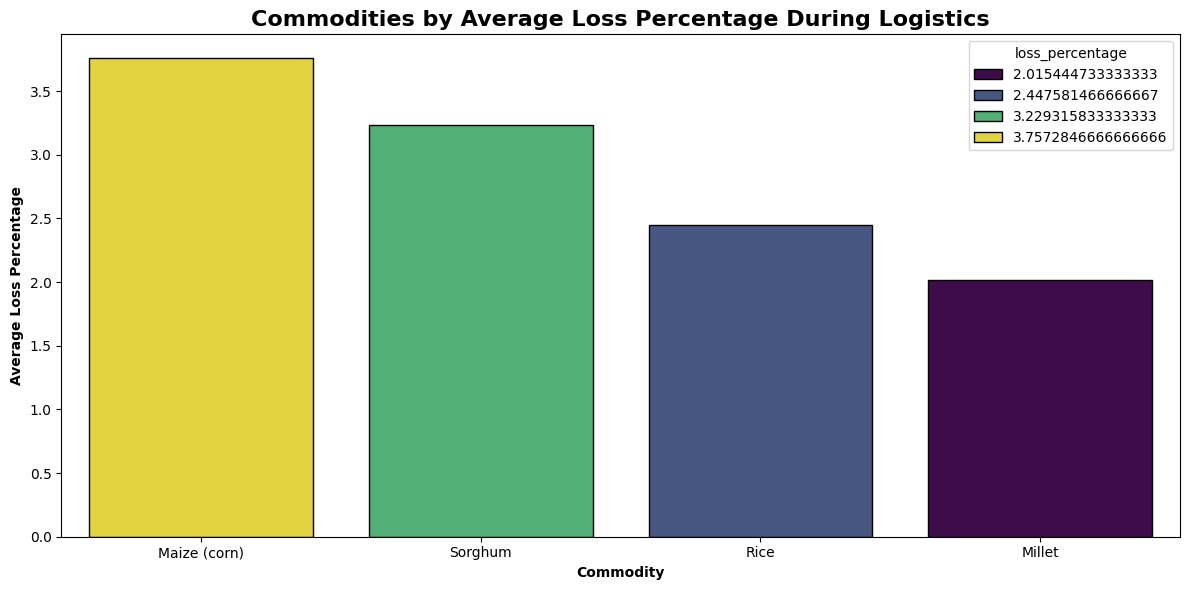

In [24]:
# Plot for top regions
plt.figure(figsize=(12,6))
sns.barplot(x=region_loss.head(10).values, y=region_loss.head(10).index,
            palette="coolwarm", edgecolor='black', hue=region_loss.head(10).index)  # Added hue to avoid warning
plt.title("Top 10 Regions by Average Loss Percentage During Logistics", fontsize=16, weight='bold',color='red')
plt.xlabel("Average Loss Percentage",color='red',weight='bold')
plt.ylabel("Region",color='green',weight='bold')
plt.tight_layout()
plt.show()

# Plot for Top Years
#plt.figure(figsize=(12,6))
#sns.barplot(x=year_loss.head(10).values, y=year_loss.head(10).index,
            #palette="coolwarm", edgecolor='black', hue=year_loss.head())
#plt.title('Years by Average Loss Percentage During Logistics', fontsize=16, weight='bold')
#plt.xlabel('Average Loss Percentage')
#plt.ylabel('Year')
#plt.tight_layout()
#plt.show()

# Plot for Top Commodities
plt.figure(figsize=(12,6))
sns.barplot(y=commodity_loss.head(10).values, x=commodity_loss.head(10).index,
            palette="viridis", edgecolor='black', hue=commodity_loss.head(6))
plt.title('Commodities by Average Loss Percentage During Logistics', fontsize=16, weight='bold')
plt.ylabel('Average Loss Percentage',weight='bold')
plt.xlabel('Commodity',weight='bold')
plt.tight_layout()
plt.show()

### **Interpretation**


1.  There are 6 activities during Logistics namely Drying,Transportation,
    Drying-Harvesting,Shelling-Threshing,Storage and the Winnowing. The activity with highest loss percentage is the Drying Harvesting with 27% loss followed by the Drying activity with 23% loss. Winnowing and transportation are the logistics activity with the lowest loss to the farmers.

2. The analysis and visualization above shows that Maize has the highest
   average loss percentage with over 4% followed by Sorghum with approximately 3.3%. Millet has the lowest loss percentage during Logistics.
   During movement say from point of harvest to market or market to farm as the case maybe, Maize farmers tend to have the highest loss percentage while Millet farmers have the least loss.

3. During Food supply storage, Farmers record more loss at harvest than
   when farming.

4. By region, Kaduna and Kastina has the highest loss percentage by  
   region with appoximately 4% loss followed Ebonyi and Niger state with 3% loss respctively.
   For the years, the loss percentage is static accross the 3 years with approximately 3% loss each year (2019,2020 and 2021).
    

### **Prediction**

In [25]:
# Group by year and calculate the mean loss percentage
yearly_loss = df_log.groupby('year')['loss_percentage'].mean().reset_index()


yearly_loss['year'] = pd.to_numeric(yearly_loss['year'])

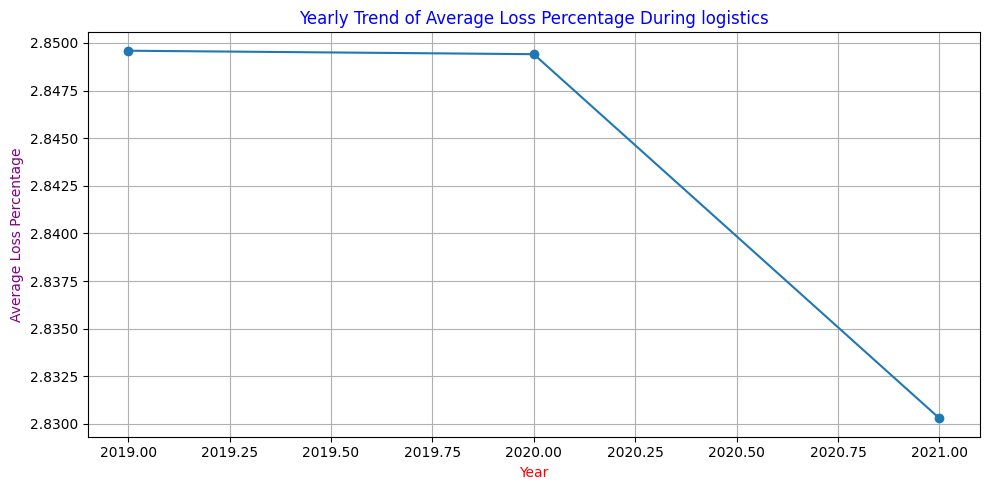

In [27]:
#Confirm if there’s a trend worth modeling

plt.figure(figsize=(10,5))
plt.plot(yearly_loss['year'], yearly_loss['loss_percentage'], marker='o', linestyle='-')
plt.title("Yearly Trend of Average Loss Percentage During logistics",color ='blue')
plt.xlabel("Year",color ='red')
plt.ylabel("Average Loss Percentage",color = 'purple')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:

# setting my features and target
X = yearly_loss[['year']]  # independent variable
y = yearly_loss['loss_percentage']  # dependent variable

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict for existing and future years
future_years = pd.DataFrame({'year': np.arange(yearly_loss['year'].min(), yearly_loss['year'].max() + 6)})
future_preds = model.predict(future_years)

# Add predictions to the DataFrame
future_years['predicted_loss_percentage'] = future_preds

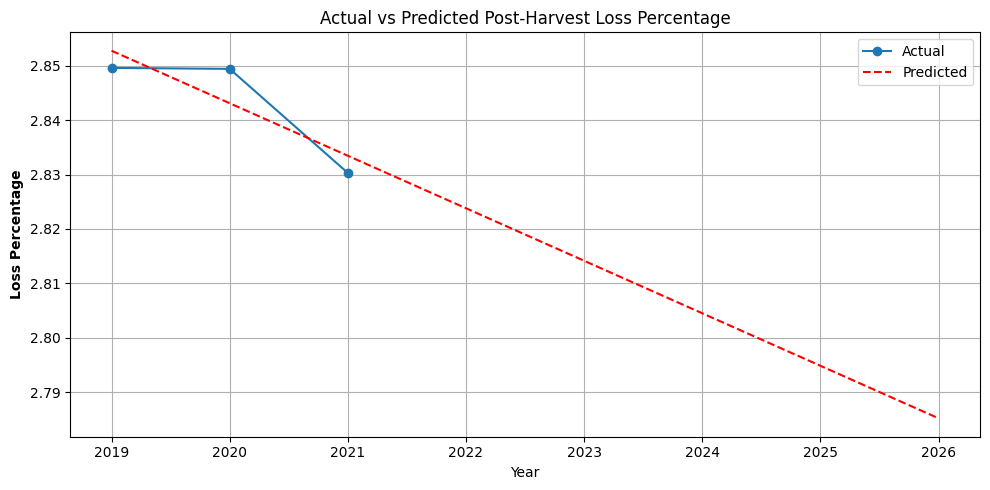

In [29]:
#Visualizing my predictions

plt.figure(figsize=(10,5))
plt.plot(yearly_loss['year'], yearly_loss['loss_percentage'], marker='o', label='Actual')
plt.plot(future_years['year'], future_years['predicted_loss_percentage'], linestyle='--', color='red', label='Predicted')
plt.title("Actual vs Predicted Post-Harvest Loss Percentage")
plt.xlabel("Year")
plt.ylabel("Loss Percentage",weight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()